# Nearest neighbor classifier 

**Aim:** Visualise the decision surface of a k-NN classifier.

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Question 1

Make a function `plot(X,y)` that plots a scatter plot of a two dimensional data matrix `X` coloring the instances according to the one dimensional array `y`.

In [60]:
def plot(X,y=None):
    # YOUR CODE HERE
    x1 = X[:,0]
    x2 = X[:,1]
    plt.figure(figsize=(7,7))
    plt.grid()
    if type(y) == np.ndarray:
        plt.scatter(x1, x2, c=y)
    else:
        plt.scatter(x1,x2)

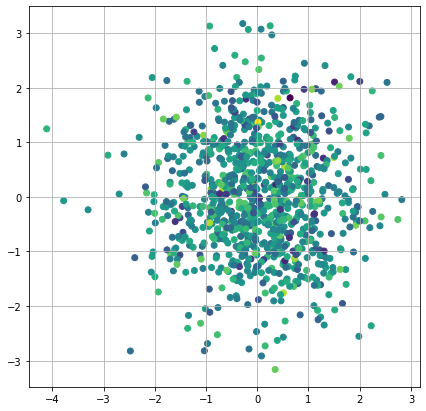

In [61]:
X = np.random.randn(1000,2)
y = np.random.randn(1000,1)
plot(X, y)

In [21]:
X = np.random.randn(10,2)
X[:,0]

array([-0.01705673,  0.71743729, -1.37361478, -0.15933487, -0.51555396,
       -1.44191177,  0.22883595,  0.62192456,  0.14504959, -0.29009897])

## Solution
Look here only after you have made a serious attempt at answering the question.

In [35]:
def plot(X,y=None):
    assert X.ndim == 2
    x0,x1 = X.T
    plt.figure(figsize=(7,7))
    if y is None:
        plt.scatter(x0,x1,edgecolor='w')
    else:
        plt.scatter(x0,x1,c=y,edgecolor='w')
    plt.grid()
    plt.show()

## Question 2

A) Make a function `X,y = make_data(n_samples)` to create a data set for a binary classification problem.
The function outputs a two dimensional data matrix `X` and a corresponding one dimensional class vector `y`. 

Do make use of the scikit function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). 

Study the function parameters. 

**Additional references:** Faizan Ahemad, [Generating Synthetic Classification Data using Scikit](https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922), Towards Data Science, 2019


You can use the following configuration:

```
        n_features=2, 
        n_informative=2, 
        n_redundant=0, 
        n_repeated=0,
        n_classes=2, 
        n_clusters_per_class=2,
        class_sep=.7,
        flip_y=0.2,
        weights=[0.5,0.5]
```

B) Use the scikit function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train%20test#sklearn.model_selection.train_test_split) to create a data matrix (and corresponding target vector) for training and for test. 

Study the function parameters. 

Visualize the following:
```
plot(X_train,y_train)
plot(X_test,y_test)
```

In [36]:
from sklearn.datasets import make_classification

def make_data(n_samples):
    # YOUR CODE HERE
    X, y = make_classification(n_samples=n_samples, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=2,class_sep=.7,
                              flip_y=0.2,weights=[0.5,0.5])
    return X,y

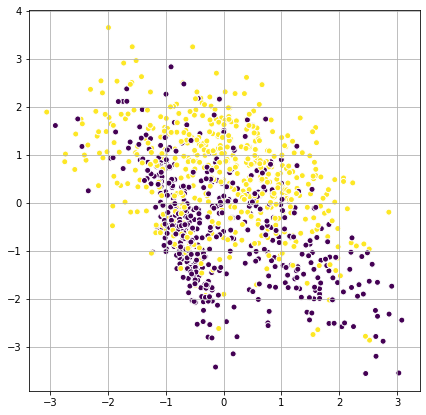

In [37]:
X,y = make_data(n_samples=1000)
plot(X,y)

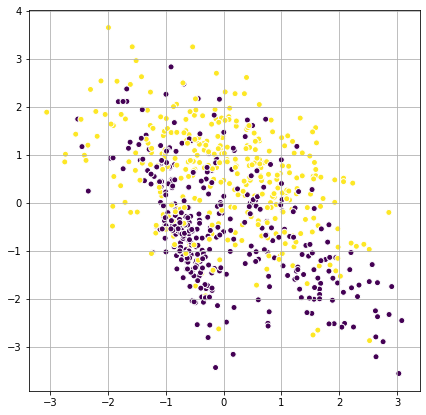

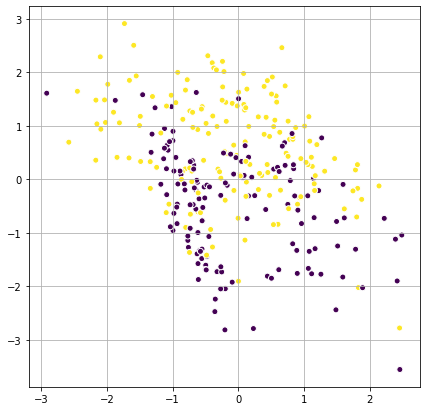

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)
plot(X_train,y_train)
plot(X_test,y_test)

## Solution
Look here only after you have made a serious attempt at answering the question.

In [39]:
from sklearn.datasets import make_classification

def make_data(n_samples):
    X,y = make_classification(
        n_samples=n_samples, 
        n_features=2, 
        n_informative=2, 
        n_redundant=0, 
        n_repeated=0,
        n_classes=2, 
        n_clusters_per_class=2,
        class_sep=.7,
        flip_y=0.2,
        weights=[0.5,0.5], 
        random_state=17)
    return X,y

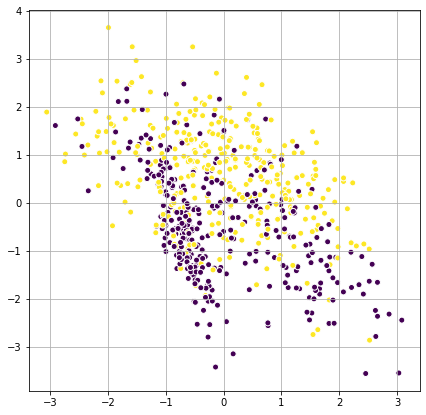

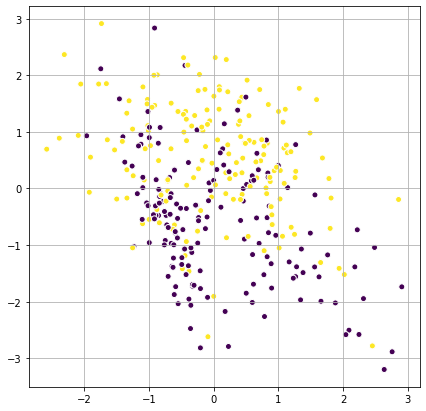

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plot(X_train,y_train)
plot(X_test,y_test)

## Question 3

Make a function `y_pred = predict_knn(X_test, X_train, y_train, k)` that outputs a one dimensional array containing the class predicted for `X_test` by the k-nearest neighbor algorithm for `k` neighbors over the data in `X_train, y_train`.

Do not use directly the scikit function [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Useful auxiliary functions to build `predict_knn` are:

- `distance(X1,X2)` in `scipy.spatial`
- `argsort(A)` in `numpy`
- `mode` in `scipy.stats`

Study the use of these function in the next cells.

In [111]:
# distance

from scipy.spatial import distance
data_mtx1 = [(1, 1),(2, 1),(1, 2),(2, 2)]
data_mtx2 = [(10, 10),(20, 10),(10, 20),(20, 20)]
D1 = distance.cdist(data_mtx1, data_mtx1)
D2 = distance.cdist(data_mtx1, data_mtx2)
print('Distance of each sample from other samples in the same data matrix')
print(D1)
print()
print('Distance of each sample in data_mtx1 from other samples in data_mtx2')
print(D2)

Distance of each sample from other samples in the same data matrix
[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]]

Distance of each sample in data_mtx1 from other samples in data_mtx2
[[12.72792206 21.02379604 21.02379604 26.87005769]
 [12.04159458 20.1246118  20.61552813 26.17250466]
 [12.04159458 20.61552813 20.1246118  26.17250466]
 [11.3137085  19.6977156  19.6977156  25.45584412]]


In [72]:
# argsort 

import numpy as np

mtx = np.random.randint(10, size=(5,3))
print('Original data')
print(mtx)
print()
print('the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array')
ids = np.argsort(mtx, axis=1)
print(ids)
print('Make sure to understand the notion of axis')

Original data
[[6 5 3]
 [1 3 1]
 [2 0 5]
 [1 2 0]
 [5 8 4]]

the sorted indices, i.e. considering the elements in the order specified by the indices one obtains a sorted array
[[2 1 0]
 [0 2 1]
 [1 0 2]
 [2 0 1]
 [2 0 1]]
Make sure to understand the notion of axis


In [120]:
# mode
import scipy as sp
mtx = np.random.randint(5, size=(3,10))
print('Original data')
print(mtx)
print()
print('the mode, i.e. most frequent element')
print(sp.stats.mode(mtx, axis=1))

A,B = sp.stats.mode(mtx, axis=1)
print('Values')
print(A)
print()
print('Counts')
print(B)

Original data
[[4 4 1 0 2 2 4 2 0 0]
 [4 0 0 2 2 3 4 0 2 3]
 [2 4 2 0 4 3 3 3 3 4]]

the mode, i.e. most frequent element
ModeResult(mode=array([[0],
       [0],
       [3]]), count=array([[3],
       [3],
       [4]]))
Values
[[0]
 [0]
 [3]]

Counts
[[3]
 [3]
 [4]]


In [79]:
from scipy.spatial import distance

def _vote(self, neighbor_labels):
    counts = np.bincount(neighbor_labels.astype('int'))
    return counts.argmax()
    
def predict_knn(X_test, X_train, y_train, k):
    y_pred = np.empty(X_test.shape[0])
    for i, test_sample in enumerate(X_test):
        idx = np.argsort([distance.euclidean(test_sample, x) for x in X_train])[:k]
        k_nearest_neighbors = np.array([y_train[i] for i in idx])
        y_pred[i] = _vote(k_nearest_neighbors) 

    return y_pred

## Solution
Look here only after you have made a serious attempt at answering the question.

In [48]:
def predict_knn(X_test, X_train, y_train, k):
    D = distance.cdist(X_test, X_train)
    ids = np.argsort(D, axis=1)
    id_neigs = ids[:,:k]
    preds = y_train[id_neigs]
    values, counts = sp.stats.mode(preds, axis=1)
    avg_preds = values.reshape(-1)
    return avg_preds

## Question 4

A) Make a function `make_grid(X, n_samples)` that outputs a two dimensional array containing in total `n_samples` instances arranged as a regular grid. Use the input data matrix `X` to extract the boundaries (i.e. the min, max values for each axis)/

B) Make a function `plot_decision_surface(X,y,X_grid,yg)` that plots a scatter plot for the data matrix `X` and the grid points in the data matrix `X_grid` using `y` and `yg` respectively to color the instances. 

In [56]:
def make_grid(X, n_samples):
    assert X.ndim==2
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    print(mins)
    n_samples_per_side = int(np.sqrt(n_samples))
    data_mtx = []
    for x0 in np.linspace(mins[0],maxs[0], n_samples_per_side):
        for x1 in np.linspace(mins[1],maxs[1], n_samples_per_side):
            data_mtx.append([x0,x1])
    data_mtx = np.vstack(data_mtx)
    return data_mtx

In [57]:
def plot_decision_surface(X,y,X_grid,yg):
    assert X.ndim == 2 and X_grid.ndim==2
    x0,x1 = X.T
    g0,g1 = X_grid.T
    plt.figure(figsize=(7 ,7))
    plt.scatter(g0,g1,c=yg,alpha=.3)
    plt.scatter(x0,x1,c=y,edgecolor='k')
    plt.grid()
    plt.show()

[-3.06567493 -3.5590102 ]


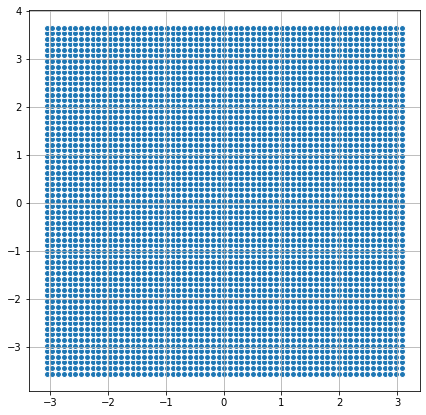

In [58]:
X_grid = make_grid(X_train, n_samples=4000)
plot(X_grid)

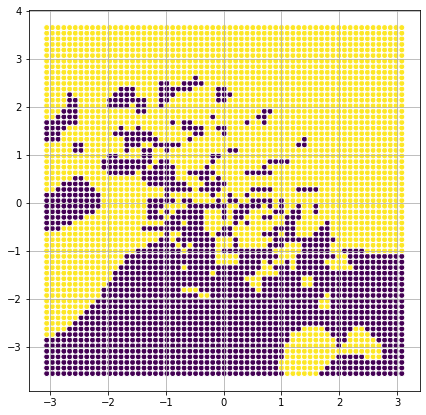

In [52]:
y_pred = predict_knn(X_grid, X_train, y_train, k=1)
plot(X_grid,y_pred)

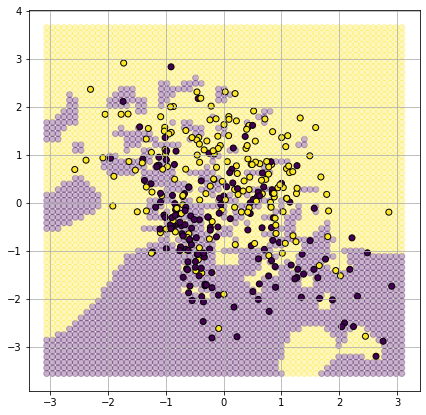

In [54]:
yg = predict_knn(X_grid, X_train, y_train, k=1)
plot_decision_surface(X_test,y_test,X_grid,yg)

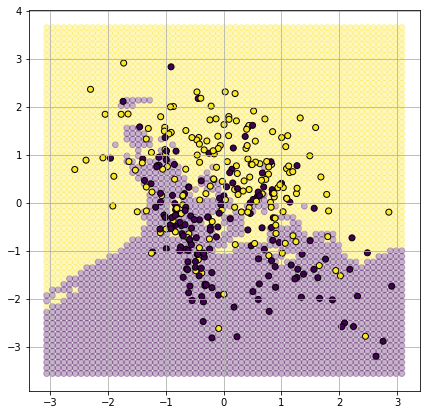

In [55]:
yg = predict_knn(X_grid, X_train, y_train, k=7)
plot_decision_surface(X_test,y_test,X_grid,yg)

## Solution
Look here only after you have made a serious attempt at answering the question.

In [74]:
def make_grid(X, n_samples):
    assert X.ndim==2
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    n_samples_per_side = int(np.sqrt(n_samples))
    data_mtx = []
    for x0 in np.linspace(mins[0],maxs[0], n_samples_per_side):
        for x1 in np.linspace(mins[1],maxs[1], n_samples_per_side):
            data_mtx.append([x0,x1])
    data_mtx = np.vstack(data_mtx)
    return data_mtx

In [91]:
def plot_decision_surface(X,y,X_grid,yg):
    assert X.ndim == 2 and X_grid.ndim==2
    x0,x1 = X.T
    g0,g1 = X_grid.T
    plt.figure(figsize=(7 ,7))
    plt.scatter(g0,g1,c=yg,alpha=.3)
    plt.scatter(x0,x1,c=y,edgecolor='k')
    plt.grid()
    plt.show()